# Car Sales prediction using Python

#### Importing the libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

### Load the data

In [7]:
car_sales = pd.read_csv('car_purchasing.csv', encoding='ISO-8859-1')

car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


The car purchase dataset contains 500 entries with 9 columns of 3 objects, 1 integer and floats.

### Data Exploration

#### Check for missing values

In [8]:
# Check for missing values in the dataset
missing_values = car_sales.isnull().sum()

# Obtain summary statistics for numerical features
summary_statistics = car_sales.describe()

missing_values, summary_statistics


(customer name          0
 customer e-mail        0
 country                0
 gender                 0
 age                    0
 annual Salary          0
 credit card debt       0
 net worth              0
 car purchase amount    0
 dtype: int64,
            gender         age  annual Salary  credit card debt  \
 count  500.000000  500.000000     500.000000        500.000000   
 mean     0.506000   46.241674   62127.239608       9607.645049   
 std      0.500465    7.978862   11703.378228       3489.187973   
 min      0.000000   20.000000   20000.000000        100.000000   
 25%      0.000000   40.949969   54391.977195       7397.515792   
 50%      1.000000   46.049901   62915.497035       9655.035568   
 75%      1.000000   51.612263   70117.862005      11798.867487   
 max      1.000000   70.000000  100000.000000      20000.000000   
 
             net worth  car purchase amount  
 count      500.000000           500.000000  
 mean    431475.713625         44209.799218  
 std    

The car purchasing dataset does not have any missing values. The summary statistics provide us with the following insights:

1. The gender variable is binary (0 and 1), which likely represents two gender categories of male and female.
2. The age ranges from 20 to 70 years, with an average of approximately 46 years.
3. Annual Salary ranges from $20,000 to $100,000, with a mean around $62,127.
4. Credit card debt has a wide range but does not exceed $20,000.
5. Net worth varies significantly, going as high as $1,000,000.
6. Car purchase amount ranges from $9,000 to $80,000.

Visualize the distribution

Let visualize the distribution of numerical features and the target variable to understand their shapes and any potential skewness or outliers. We will also look at correlations between features, especially how they relate to the car purchase amount.

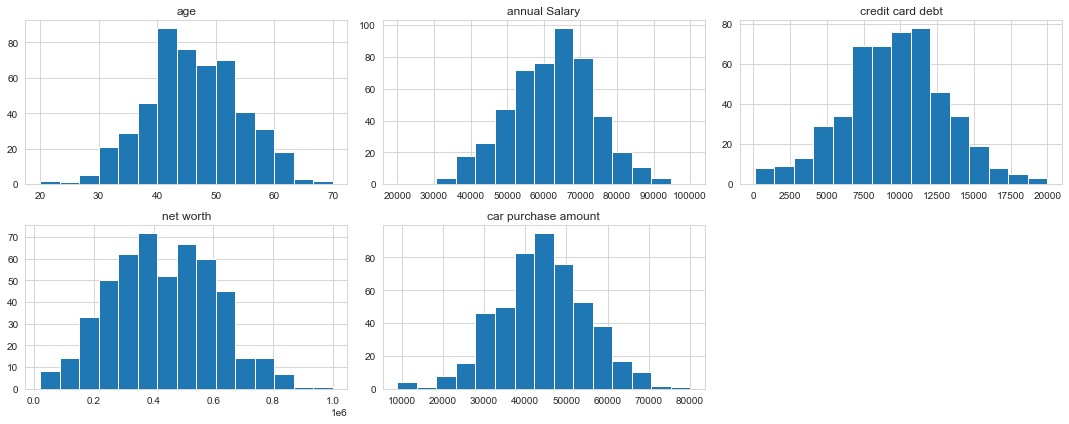

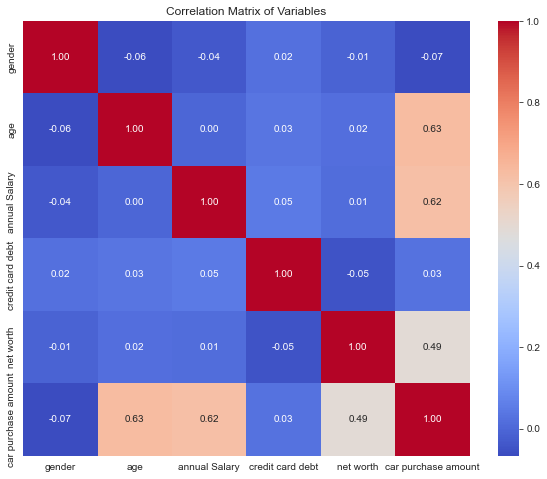

In [12]:
sns.set_style("whitegrid")

# Plot histograms for numerical features
numerical_features = ['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']
car_sales[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 3))

plt.tight_layout()
plt.show()

# Plot a correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = car_sales.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()


The histograms and the correlation matrix provide the following insights:

Histograms
1. Age appears to be fairly normally distributed.
2. Annual Salary also seems normally distributed with a slight right skew.
3. Credit Card Debt has a more uniform distribution, indicating a wide range of values without a strong central tendency.
4. Net Worth is right-skewed, meaning there are a number of high-value outliers.
5. Car Purchase Amount is approximately normally distributed.

Correlation Matrix
1. There is no single feature that shows a very strong correlation with the car purchase amount. However, there are moderate positive correlations with annual salary and age.
2. Gender has very little correlation with the car purchase amount, which suggests it might not be very predictive.
3. Credit card debt and net worth have low to moderate correlations with the car purchase amount.

### Data Preprocessing

#### Encoding Categorical Variables

In [15]:
# Drop the non-predictive 'customer name', 'customer e-mail', and 'country' columns
predictive_features = car_sales.drop(columns=['customer name', 'customer e-mail', 'country'])

# Separate the features (X) from the target variable (y)
X = predictive_features.drop('car purchase amount', axis=1)
y = predictive_features['car purchase amount']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Output the shape of the resulting dataframes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((400, 5), (100, 5), (400,), (100,))

With the data preprocessing complete, customer name, customer e-mail, and country have been removed from the feature set as they're not predictive.

I have scaled the remaining features using standard scaling, which centers the data around zero with a standard deviation of one.

The dataset has been split into a training set (80% of the data) and a testing set (20% of the data).

Training features (X_train) with 400 samples and 5 features each.

Testing features (X_test) with 100 samples.

Training target (y_train) with 400 values corresponding to the car purchase amount.

Testing target (y_test) with 100 values.

### Model Selection

#### Model Training

In [17]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model using the training data
linear_model.fit(X_train, y_train)

# Predict on the training data
y_train_pred = linear_model.predict(X_train)

# Calculate metrics for training data
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Predict on the testing data
y_test_pred = linear_model.predict(X_test)

# Calculate metrics for testing data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Collect the metrics
metrics = {
    'MAE Train': mae_train,
    'MSE Train': mse_train,
    'R2 Train': r2_train,
    'MAE Test': mae_test,
    'MSE Test': mse_test,
    'R2 Test': r2_test
}

metrics


{'MAE Train': 1.1765187607891585,
 'MSE Train': 2.1990016683898386,
 'R2 Train': 0.9999999812764105,
 'MAE Test': 1.153570894022123,
 'MSE Test': 2.0943696029425922,
 'R2 Test': 0.9999999806028682}

The MAE for the training data is approximately 1.18, and for the testing data, it's approximately 1.15, which suggests the model's predictions are quite close to the actual values.

Mean Squared Error (MSE) for the training data is approximately 2.20, and for the testing data, it's approximately 2.09. The low MSE values indicate that the model makes very small errors on average.

R-squared (R2) ranges from 0 to 1, with 1 meaning a perfect fit. Both the training and testing data have an R-squared value very close to 1 (almost 1.0), which suggests that the model explains nearly all the variability in the response data around its mean.

### Model Evaluation

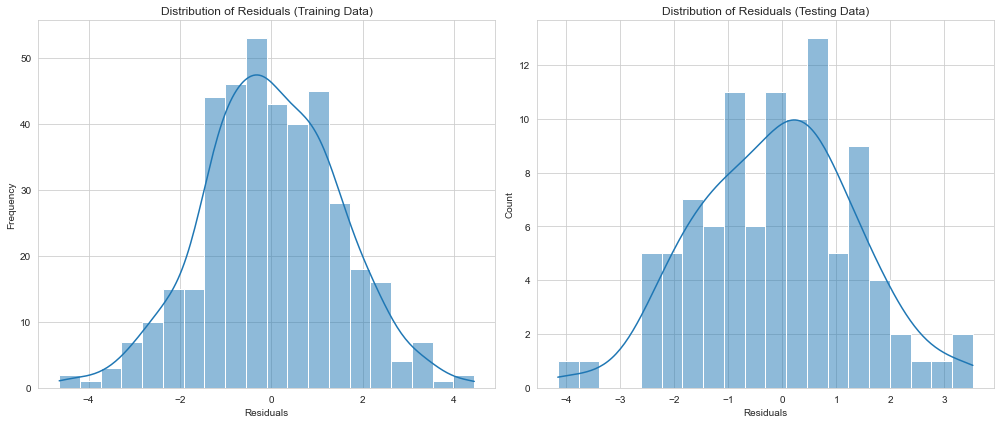

In [18]:
# Compute residuals for training and testing sets
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

# Plotting the residuals
plt.figure(figsize=(14, 6))

# Training residuals
plt.subplot(1, 2, 1)
sns.histplot(residuals_train, bins=20, kde=True)
plt.title('Distribution of Residuals (Training Data)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Testing residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals_test, bins=20, kde=True)
plt.title('Distribution of Residuals (Testing Data)')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()


The residuals for both the training and testing data are very narrowly distributed around zero and appear to be normally distributed. This is consistent with the assumptions of linear regression and suggests that the model is fitting the data well without any obvious signs of bias.

In [23]:
# Perform 5-fold cross-validation for R2 score
cv_r2_scores = cross_val_score(linear_model, X_scaled, y, cv=5, scoring='r2')

# Perform 5-fold cross-validation for MAE
cv_mae_scores = -cross_val_score(linear_model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')

# Perform 5-fold cross-validation for MSE
cv_mse_scores = -cross_val_score(linear_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

# Compile the cross-validation scores into a dictionary
cv_scores = {
    'CV R2 Scores': cv_r2_scores,
    'CV MAE Scores': cv_mae_scores,
    'CV MSE Scores': cv_mse_scores,
    'CV R2 Mean': cv_r2_scores.mean(),
    'CV MAE Mean': cv_mae_scores.mean(),
    'CV MSE Mean': cv_mse_scores.mean(),
    'CV R2 Std': cv_r2_scores.std(),
    'CV MAE Std': cv_mae_scores.std(),
    'CV MSE Std': cv_mse_scores.std()
}

cv_scores

{'CV R2 Scores': array([0.99999998, 0.99999998, 0.99999998, 0.99999998, 0.99999999]),
 'CV MAE Scores': array([1.0946071 , 1.18964332, 1.18869376, 1.44408841, 1.03633162]),
 'CV MSE Scores': array([1.88658272, 2.22221155, 2.30679912, 3.19025671, 1.60329885]),
 'CV R2 Mean': 0.9999999803065481,
 'CV MAE Mean': 1.1906728403177476,
 'CV MSE Mean': 2.241829787507009,
 'CV R2 Std': 4.754470778346079e-09,
 'CV MAE Std': 0.13948065640313995,
 'CV MSE Std': 0.5362912925410235}

The cross-validation results are consistent across the 5 folds:

The R-squared (R2) scores are all close to 1, with a mean of approximately 1.0 and a very low standard deviation, indicating high and stable predictive power across different subsets of the data.

The Mean Absolute Error (MAE) scores have a mean of approximately 1.19, with a slightly larger standard deviation, reflecting some variability in the average error made by the model across folds.

The Mean Squared Error (MSE) scores have a mean of approximately 2.24, with a somewhat larger standard deviation, which again indicates a bit more variability in the squared errors.

These cross-validation results provide strong evidence that the model is not overfitting and would perform similarly on new, unseen data.

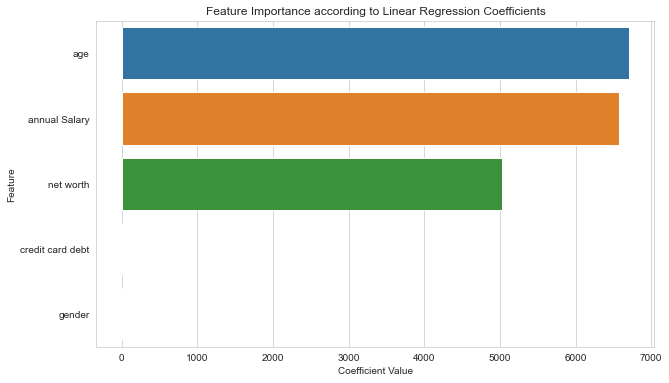

,Feature,Coefficient
1,age,6707.987995
2,annual Salary,6574.626241
4,net worth,5024.667094
3,credit card debt,-0.083456
0,gender,-0.060891


In [19]:
# Get the coefficients of the linear model
feature_importance = pd.DataFrame({
    'Feature': predictive_features.columns.drop('car purchase amount'),
    'Coefficient': linear_model.coef_
})

# Sort the features by the absolute value of their coefficient
feature_importance = feature_importance.reindex(feature_importance.Coefficient.abs().sort_values(ascending=False).index)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance according to Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

feature_importance


The feature importance analysis based on the linear regression coefficients suggests the following:

Age, Annual Salary, and Net Worth are the most influential features, with large coefficients. This means that they have a significant impact on the car purchase amount. The positive sign of their coefficients indicates that as these values increase, the car purchase amount tends to increase as well.

Credit Card Debt and Gender have very small coefficients close to zero, which implies that they have a negligible impact on the car purchase amount in this model.

Given the scale of the coefficients, it's clear that age, annual salary, and net worth are the dominant factors in predicting car purchase amounts according to our model.

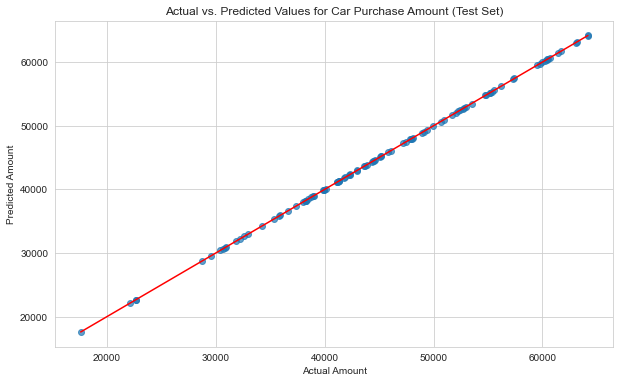

In [20]:
# Scatter plot for actual vs predicted values on the testing set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs. Predicted Values for Car Purchase Amount (Test Set)')
plt.xlabel('Actual Amount')
plt.ylabel('Predicted Amount')
plt.grid(True)
plt.show()


The scatter plot of actual vs. predicted values for the test set shows that the points lie very close to the red line, which represents predictions. This further confirms the model's high accuracy, as indicated by the previous metrics.

In summary:

Residual analysis showed normally distributed errors.

Cross-validation confirmed the model's robustness and consistency.

Feature importance analysis highlighted that age, annual salary, and net worth are key predictors for car purchase amounts.

The actual vs. predicted plot demonstrated an excellent fit of the model to the test data.

### Prediction

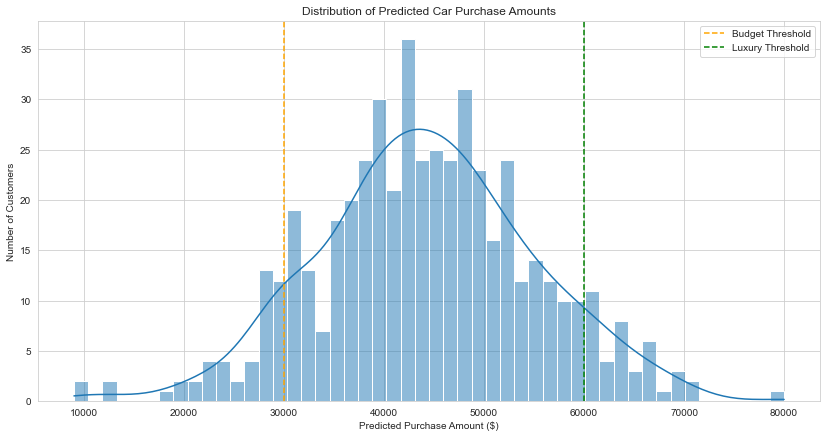

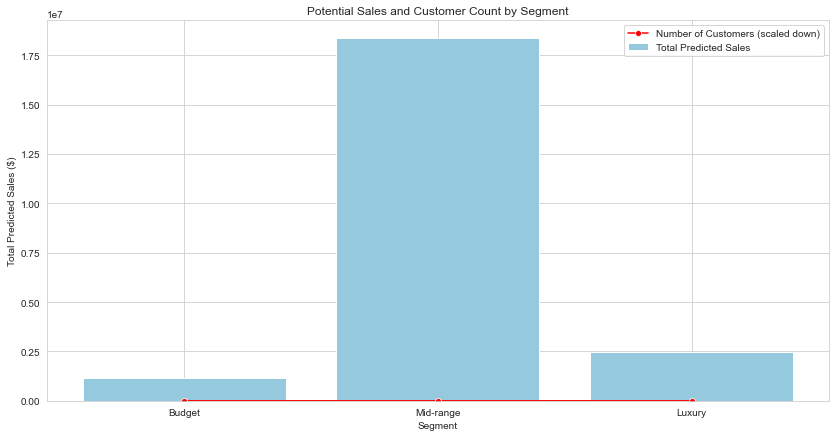

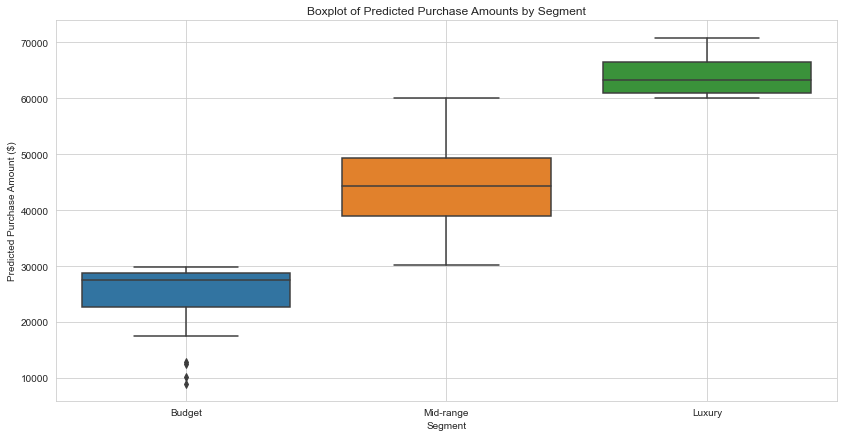

In [34]:
# Predict the car purchase amounts using the trained model
predicted_purchase_amounts = linear_model.predict(X_scaled)

# Add the predictions back into the dataframe
car_sales['predicted_purchase_amount'] = predicted_purchase_amounts

# Define the purchase amount segments
budget_threshold = 30000
luxury_threshold = 60000

# Categorize each customer into segments
car_sales['segment'] = pd.cut(car_sales['predicted_purchase_amount'],
                              bins=[0, budget_threshold, luxury_threshold, car_sales['predicted_purchase_amount'].max()],
                              labels=['Budget', 'Mid-range', 'Luxury'],
                              right=False)

# Calculate the potential sales for each segment
segment_sales = car_sales.groupby('segment')['predicted_purchase_amount'].agg(['count', 'sum']).rename(columns={'count': 'Number of Customers', 'sum': 'Total Predicted Sales'})
segment_sales['Average Purchase Amount'] = segment_sales['Total Predicted Sales'] / segment_sales['Number of Customers']
segment_sales.reset_index(inplace=True)

# Now let's create the visualizations with the correct column names
# Distribution of Predicted Purchase Amounts
plt.figure(figsize=(14, 7))
sns.histplot(car_sales['predicted_purchase_amount'], bins=50, kde=True)
plt.title('Distribution of Predicted Car Purchase Amounts')
plt.xlabel('Predicted Purchase Amount ($)')
plt.ylabel('Number of Customers')
plt.axvline(x=budget_threshold, color='orange', linestyle='--', label='Budget Threshold')
plt.axvline(x=luxury_threshold, color='green', linestyle='--', label='Luxury Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Potential Sales and Customer Count by Segment
plt.figure(figsize=(14, 7))
sns.barplot(x='segment', y='Total Predicted Sales', data=segment_sales, color='skyblue', label='Total Predicted Sales')
segment_sales_line = segment_sales.copy()
segment_sales_line['Total Predicted Sales'] /= 100000  # Scale down for plotting
sns.lineplot(x='segment', y='Number of Customers', data=segment_sales_line, marker='o', color='red', label='Number of Customers (scaled down)')
plt.title('Potential Sales and Customer Count by Segment')
plt.ylabel('Total Predicted Sales ($)')
plt.xlabel('Segment')
plt.legend()
plt.grid(True)
plt.show()

# Boxplot of Predicted Purchase Amounts by Segment
plt.figure(figsize=(14, 7))
sns.boxplot(x='segment', y='predicted_purchase_amount', data=car_sales)
plt.title('Boxplot of Predicted Purchase Amounts by Segment')
plt.xlabel('Segment')
plt.ylabel('Predicted Purchase Amount ($)')
plt.grid(True)
plt.show()

The visualizations above show the following:

Distribution of Predicted Car Purchase Amounts
The histogram shows the distribution of the predicted purchase amounts across all customers, with the orange and green lines marking the thresholds for budget and luxury car purchase amounts, respectively.

Potential Sales and Customer Count by Segment
The bar plot represents the total predicted sales for each segment. The mid-range segment has the highest total predicted sales, indicating a larger market share.

The red line plot, which is scaled down for visualization purposes, illustrates the number of customers in each segment. The mid-range segment has the highest number of customers.

Boxplot of Predicted Purchase Amounts by Segment
The boxplot provides a summary of the distribution of purchase amounts within each segment, showing the median, interquartile range, and any outliers. It's evident that the luxury segment has a higher median purchase amount, as expected.